In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# A

In [91]:
def generate_noisy_periodic(a, t_min, t_max, n_points, noise_level=0.1):
    t = np.linspace(t_min, t_max, n_points)
    y = a[0] + a[1] * t + a[2] * np.sin(a[4] * t) + a[3] * np.cos(a[4] * t)
    noise = noise_level * np.random.randn(n_points)
    y += noise
    return t, y, noise_level * np.ones(n_points)

# B

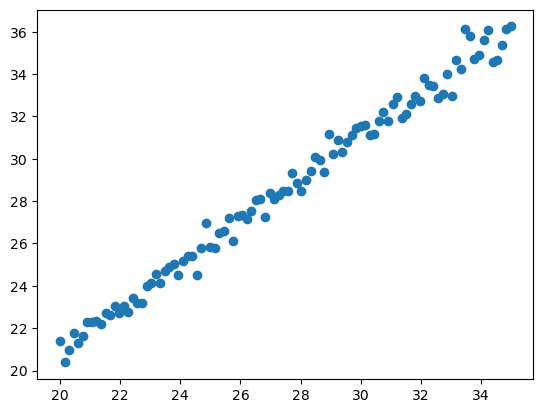

In [92]:
a = [0, 1, 1, 1, 0]
t, y, y_uncertainty = generate_noisy_periodic(a, 20, 35, 100, 0.5)
_=plt.scatter(t, y)


# C

In [124]:
from scipy.optimize import curve_fit

def fitfunction(x, a0, a1, a2, a3, a4):
    return a0 + a1 * x + a2 * np.sin(a4 * x) + a3 * np.cos(a4 * x)

# init_guess = [1, 1, 1, 1, 1]
init_guess = [0, 0, 0, 0, 0]
# popt, pcov = curve_fit(fitfunction, t, y, p0=init_guess, maxfev=50000)
popt, pcov = curve_fit(fitfunction, t, y, sigma=y_uncertainty, absolute_sigma=True, p0=init_guess)

In [125]:
for i in range(len(popt)):
    print(f'a_{i} = {a[i]}')
    print(f'a\u0302_{i} = {np.round(popt[i], 3)} +/- {np.round(np.sqrt(pcov[i,i]), 3)}')

a_0 = 0
â_0 = 0.841 +/- 0.456
a_1 = 1
â_1 = 1.009 +/- 0.017
a_2 = 1
â_2 = -0.092 +/- 0.233
a_3 = 1
â_3 = -0.029 +/- 0.676
a_4 = 0
â_4 = -0.507 +/- 0.277


Depending on how strict we are, only the fit for a_1 agrees with the true value as it lies within 1 standard deviation, while the other parameters are off by more than 1 standard deviation.

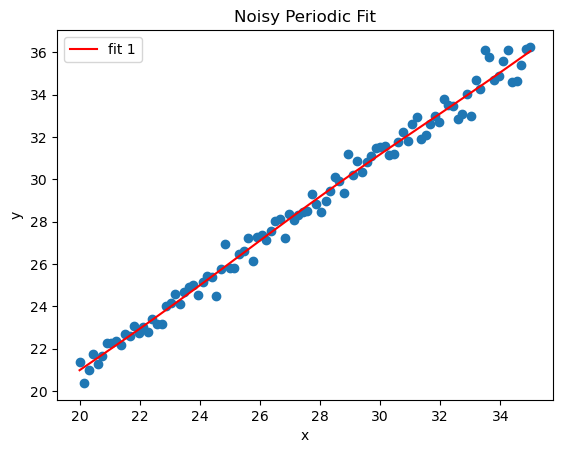

In [127]:
yfit = []
for i in range (0,100):
    yfit.append(fitfunction(t[i],*popt))
plt.scatter(t, y)
plt.plot(t, yfit, 'r-', label='fit 1')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
_=plt.title('Noisy Periodic Fit')

# D

In [128]:
def fitfunction2(x, a0, a1, a2, a3, a4):
    return a0 + a1 * x + a2 * np.sin(a3 * x + a4)

init_guess = [1, 1, 1, 1, 1]
# init_guess = [0, 0, 0, 0, 0]
# popt2, pcov2 = curve_fit(fitfunction2, t, y, p0=init_guess, maxfev=50000)
popt2, pcov2 = curve_fit(fitfunction2, t, y, sigma=y_uncertainty, absolute_sigma=True, p0=init_guess)

In [129]:
for i in range(len(popt)):
    print(f'a_{i} = {a[i]}')
    print(f'a\u0302_{i} = {np.round(popt2[i], 3)} +/- {np.round(np.sqrt(pcov2[i,i]), 3)}')

a_0 = 0
â_0 = 0.743 +/- 0.321
a_1 = 1
â_1 = 1.012 +/- 0.012
a_2 = 1
â_2 = -0.105 +/- 0.073
a_3 = 1
â_3 = 1.528 +/- 0.146
a_4 = 0
â_4 = -15.393 +/- 4.079


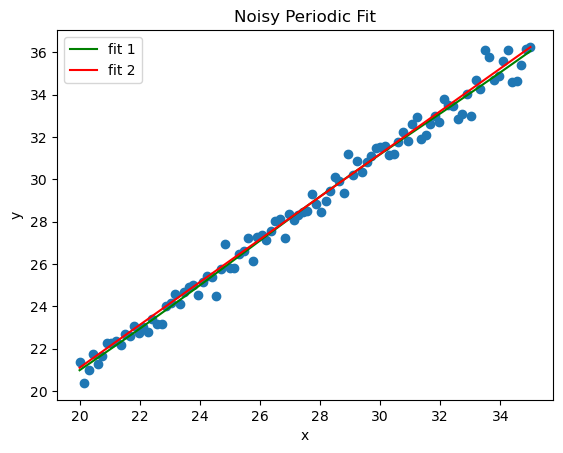

In [130]:
yfit2 = []
for i in range (0,100):
    yfit2.append(fitfunction2(t[i],*popt))
plt.scatter(t, y)
plt.plot(t, yfit, 'g-', label='fit 1')
plt.plot(t, yfit2, 'r-', label='fit 2')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
_=plt.title('Noisy Periodic Fit')

Pretty indistinguishable fits..., but the second fit is certainly more sensitive to the initial params - [0, 0, 0, 0, 0] gives a linear fit and ignores the trig component (and also cant compute errors).

See proof.jpg for the extra credit proof